In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('data.csv')
data.head(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
5,A & N Islands,2001,Causes,Family Problems,Female,0-14,0
6,A & N Islands,2001,Causes,Ideological Causes/Hero Worshipping,Female,0-14,0
7,A & N Islands,2001,Causes,Other Prolonged Illness,Female,0-14,0
8,A & N Islands,2001,Causes,Property Dispute,Female,0-14,0
9,A & N Islands,2001,Causes,Fall in Social Reputation,Female,0-14,0


In [3]:
from sklearn.preprocessing import LabelEncoder
LS = LabelEncoder()
data_encoded = data.copy()
for label in ['State', 'Type_code', 'Type', 'Gender', 'Age_group']:
    data_encoded[label] = LS.fit_transform(data_encoded[label])

data_encoded.tail(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
237509,37,2012,4,61,0,0,200
237510,37,2012,4,40,0,0,3927
237511,37,2012,4,25,0,0,182
237512,37,2012,4,68,0,0,455
237513,37,2012,4,43,0,0,1513
237514,37,2012,4,61,1,0,149
237515,37,2012,4,68,1,0,233
237516,37,2012,4,40,1,0,5451
237517,37,2012,4,25,1,0,189
237518,37,2012,4,43,1,0,2658


In [4]:
x = data_encoded.iloc[:,[2,5]].values

In [5]:
from sklearn.cluster import KMeans


In [6]:
km = KMeans(n_clusters=5, random_state =42)
y = km.fit_predict(x)

In [7]:
labels = km.labels_
print(labels)

[2 2 2 ... 1 1 1]


In [8]:
centroids = km.cluster_centers_
print(centroids)

[[ 2.42311819e+00  3.99829740e+00]
 [ 2.56346568e+00  1.36814004e+00]
 [ 2.50411862e-01  7.49588138e-01]
 [-7.99360578e-14  2.50000000e+00]
 [-7.99360578e-14  4.50000000e+00]]


In [9]:
data_encoded['labels'] = labels
data_encoded.tail(2)

,State,Year,Type_code,Type,Gender,Age_group,Total,labels
237517,37,2012,4,25,1,0,189,1
237518,37,2012,4,43,1,0,2658,1


In [10]:
x_labels = km.labels_
from sklearn.metrics import silhouette_score
print(silhouette_score(x,x_labels,sample_size=30000))

0.5904998541805941


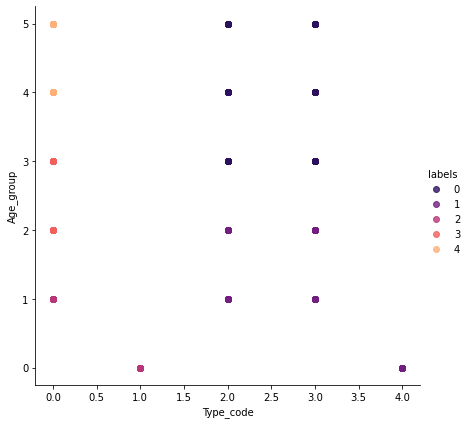

In [11]:
sns.lmplot(x='Type_code', y = 'Age_group', hue = 'labels',data=data_encoded,palette='magma', scatter = True, fit_reg=False,height=6)

plt.show()

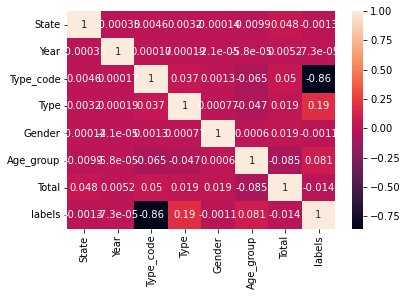

In [12]:
sns.heatmap(data_encoded.corr(), annot=True)
plt.show()

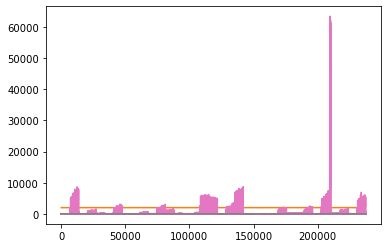

In [14]:
plt.plot(data_encoded)